# LGMVIP - Data Science Intern, April-2022

### AUTHOR - Karan Doke

### BEGINNER LEVEL TASK

### TASK 3 - Music Recommendation System:
Music recommender systems can suggest songs to users based on their listening patterns

In this task, you will be asked to predict the chances of a user listening to a song repetitively after the first observable listening event within a time window was triggered. If there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, its target is marked 1, and 0 otherwise in the training set. The same rule applies to the testing set. KKBOX provides a training data set consists of information of the first observable listening event for each unique user-song pair within a specific time duration. Metadata of each unique user and song pair is also provided. The use of public data to increase the level of accuracy of your prediction is encouraged. The train and the test data are selected from users listening history in a given time period. Note that this time period is chosen to be before the WSDM-KKBox Churn Prediction time period. The train and test sets are split based on time, and the split of public/private are based on unique user/song pairs. Tables train.csv msno: user id song_id: song id source_system_tab: the name of the tab where the event was triggered. System tabs are used to categorize KKBOX mobile apps functions. For example, tab my library contains functions to manipulate the local storage, and tab search contains functions relating to search. source_screen_name: name of the layout a user sees. source_type: an entry point a user first plays music on mobile apps. An entry point could be album, online-playlist, song .. etc. target: this is the target variable. target=1 means there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, target=0 otherwise . test.csv id: row id (will be used for submission) msno: user id song_id: song id source_system_tab: the name of the tab where the event was triggered. System tabs are used to categorize KKBOX mobile apps functions. For example, tab my library contains functions to manipulate the local storage, and tab search contains functions relating to search. source_screen_name: name of the layout a user sees. source_type: an entry point a user first plays music on mobile apps. An entry point could be album, online-playlist, song .. etc. 

#### Dataset link : https://www.kaggle.com/c/kkbox-music-recommendation-challenge/data 

## Importing Libraries

In [41]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings as wg
wg.filterwarnings("ignore")

## Importing datasets

### Train.csv dataset

In [42]:
train=pd.read_csv("E:\\INTERNSHIP\\Let's Grow More Internship\\Music Recommendation\\train.csv")
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [43]:
train.shape

(7377418, 6)

In [44]:
train.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target'],
      dtype='object')

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                object
 1   song_id             object
 2   source_system_tab   object
 3   source_screen_name  object
 4   source_type         object
 5   target              int64 
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


In [46]:
train.describe()

,target
count,7.377418e+06
mean,5.035171e-01
std,4.999877e-01
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,1.000000e+00


In [47]:
train.isnull().sum()

msno                       0
song_id                    0
source_system_tab      24849
source_screen_name    414804
source_type            21539
target                     0
dtype: int64

### Songs.csv dataset

In [48]:
songs=pd.read_csv("E:\\INTERNSHIP\\Let's Grow More Internship\\Music Recommendation\\songs.csv")
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [49]:
songs.shape

(2296320, 7)

In [50]:
songs.columns

Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')

In [51]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [52]:
songs.describe()

,song_length,language
count,2.296320e+06,2.296319e+06
mean,2.469935e+05,3.237800e+01
std,1.609200e+05,2.433241e+01
min,1.850000e+02,-1.000000e+00
25%,1.836000e+05,-1.000000e+00
50%,2.266270e+05,5.200000e+01
75%,2.772690e+05,5.200000e+01
max,1.217385e+07,5.900000e+01


In [53]:
songs.isnull().sum()

song_id              0
song_length          0
genre_ids        94116
artist_name          0
composer       1071354
lyricist       1945268
language             1
dtype: int64

### Members.csv dataset

In [54]:
members= pd.read_csv("E:\\INTERNSHIP\\Let's Grow More Internship\\Music Recommendation\\members.csv")
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [55]:
members.shape

(34403, 7)

In [56]:
members.columns

Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')

In [57]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [58]:
members.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [59]:
members.isnull().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

### Songs extra info.csv Dataset

In [60]:
song_extra_info=pd.read_csv("E:\\INTERNSHIP\\Let's Grow More Internship\\Music Recommendation\\song_extra_info.csv")
song_extra_info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [61]:
song_extra_info.shape

(2295971, 3)

In [62]:
song_extra_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295971 entries, 0 to 2295970
Data columns (total 3 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   song_id  object
 1   name     object
 2   isrc     object
dtypes: object(3)
memory usage: 52.6+ MB


In [63]:
song_extra_info.describe()

,song_id,name,isrc
count,2295971,2295969,2159423
unique,2295971,1168979,1806825
top,9i2zLa9reAFoFMolZ2HlwCV91ZDUXD/86aGpiu96ebc=,Intro,GBPS81518952
freq,1,1734,207


In [64]:
song_extra_info.isnull().sum()

song_id         0
name            2
isrc       136548
dtype: int64

### Test.csv Dataset

In [65]:
test=pd.read_csv("E:\\INTERNSHIP\\Let's Grow More Internship\\Music Recommendation\\test.csv")
test.head()                 

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [66]:
test.shape

(2556790, 6)

In [67]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   id                  int64 
 1   msno                object
 2   song_id             object
 3   source_system_tab   object
 4   source_screen_name  object
 5   source_type         object
dtypes: int64(1), object(5)
memory usage: 117.0+ MB


In [68]:
test.isnull().sum()

id                         0
msno                       0
song_id                    0
source_system_tab       8442
source_screen_name    162883
source_type             7297
dtype: int64

# Exploratory Data Analysis - EDA

## Now doing some visualiaztion on Train.csv Dataset

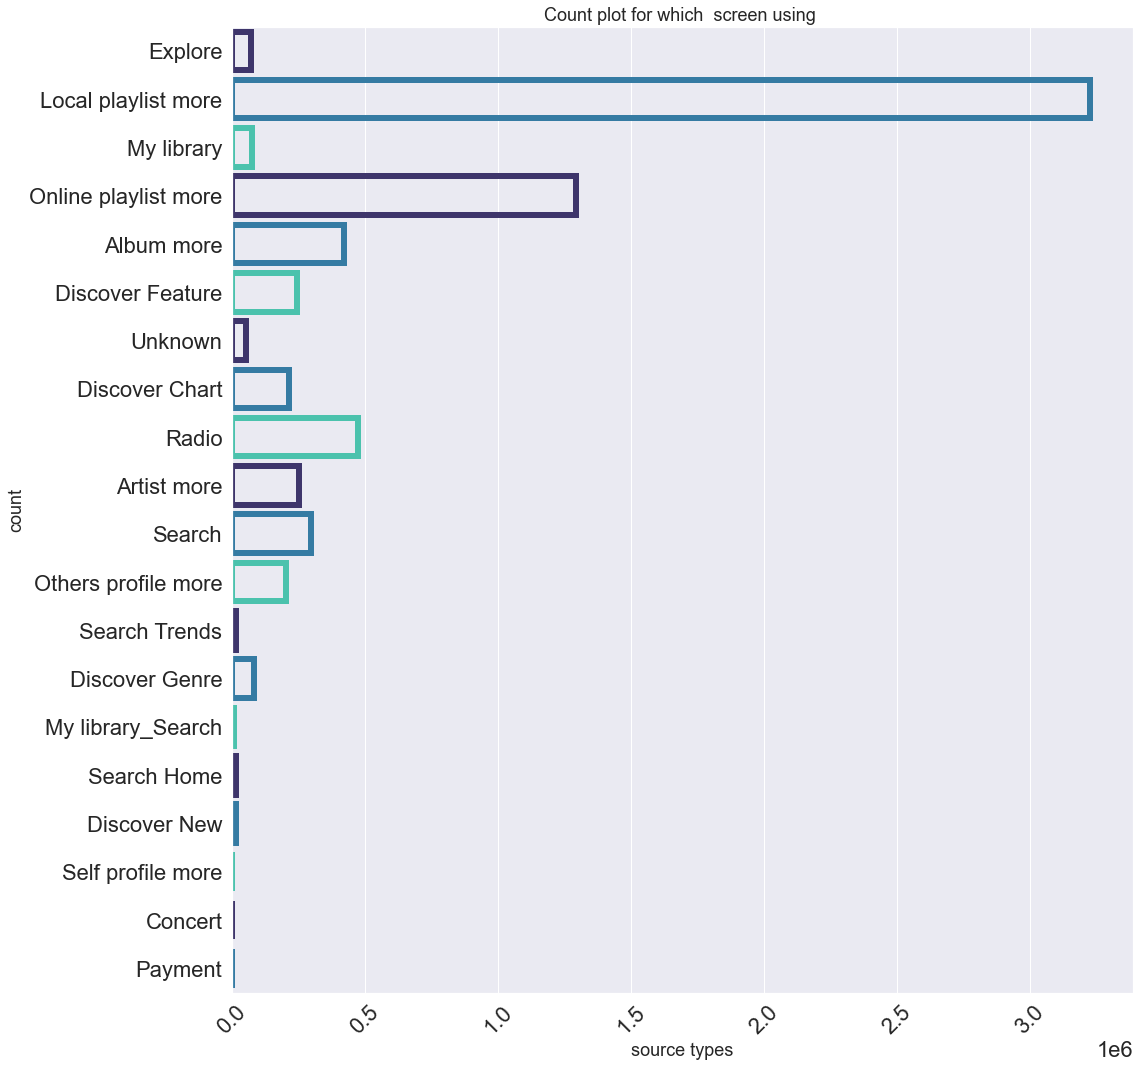

In [50]:
plt.figure(figsize=(16,15))
sns.set(font_scale=2)
sns.countplot(y='source_screen_name',data=train,facecolor=(0,0,0,0),linewidth=6,edgecolor=sns.color_palette('mako',3))
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.xticks(rotation='45')
plt.title('Count plot for which  screen using ',fontsize=18)
plt.tight_layout()

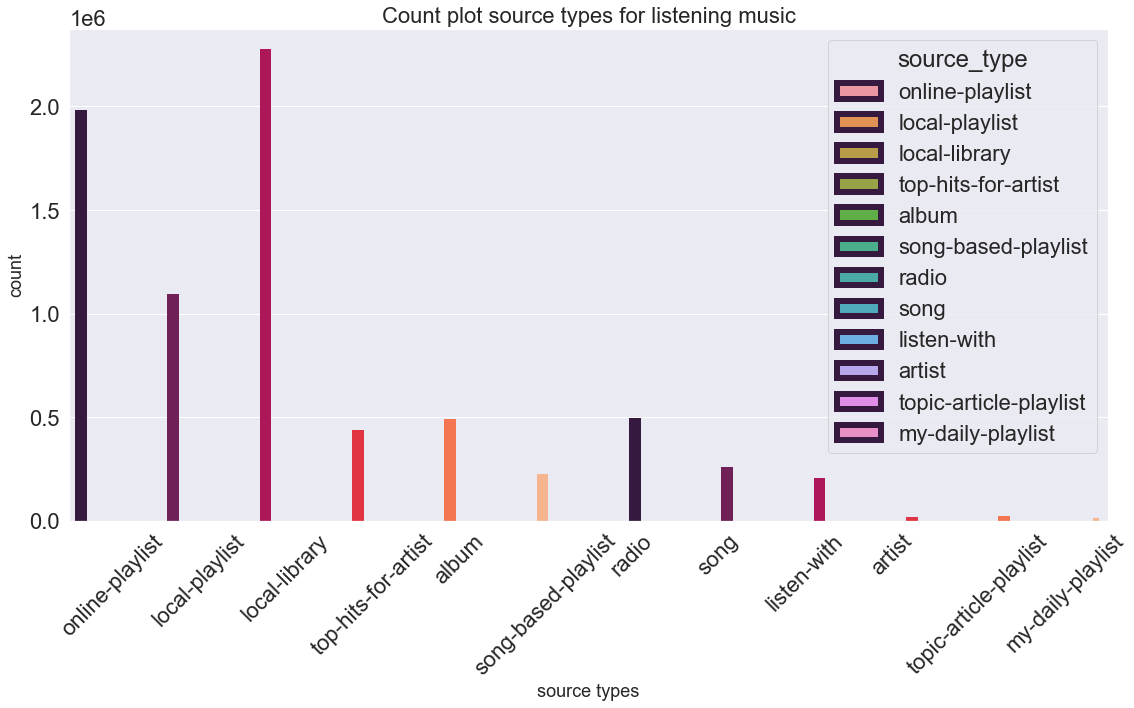

In [59]:
sns.set(rc = {'figure.figsize':(16,10)})
sns.set(font_scale=2)
sns.countplot(x='source_type',hue='source_type',data=train,linewidth=6,edgecolor=sns.color_palette('rocket'))
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.xticks(rotation='45')
plt.title('Count plot source types for listening music',fontsize=22)
plt.tight_layout()

It can be depicted from the above plot that people repeat songs from their library or discover tabs.

In [77]:
def count_plot(data, x, hue, type):
  plt.figure(figsize = (15, 8))
  sns.set(font_scale = 2)
  sns.countplot(x = x, hue = hue, data = data,edgecolor=sns.color_palette('rocket',2),palette="YlOrBr")
  plt.xlabel(x, fontsize = 18)
  plt.ylabel('count', fontsize = 18)
  plt.xticks(rotation = '90')
  plt.title('Count plot for {0} in {1} data'.format(x, type), fontsize = 18)
  plt.tight_layout()

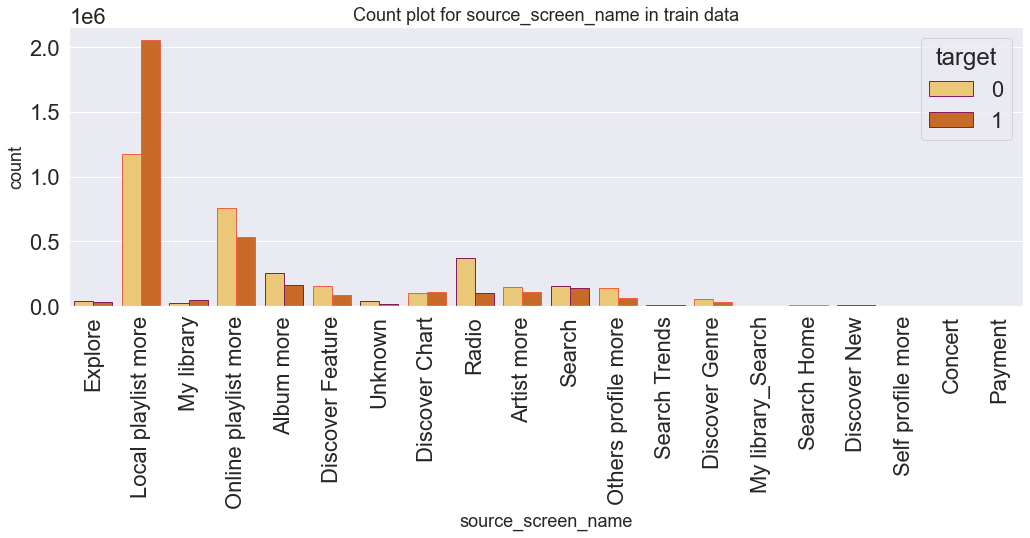

In [78]:
count_plot(train, 'source_screen_name', 'target', 'train')

## Now doing some visualiaztion on members.csv Dataset

In [92]:
def count_plot_function(data, x):
  plt.figure(figsize = (15,8))
  sns.set(font_scale = 2)
  sns.countplot(x = x, data = data,palette="husl",edgecolor=sns.color_palette('rocket',4))
  plt.xlabel(x, fontsize = 18)
  plt.ylabel('count', fontsize = 18)
  plt.xticks(rotation = '90')
  plt.title('Count plot', fontsize = 18)
  plt.tight_layout()

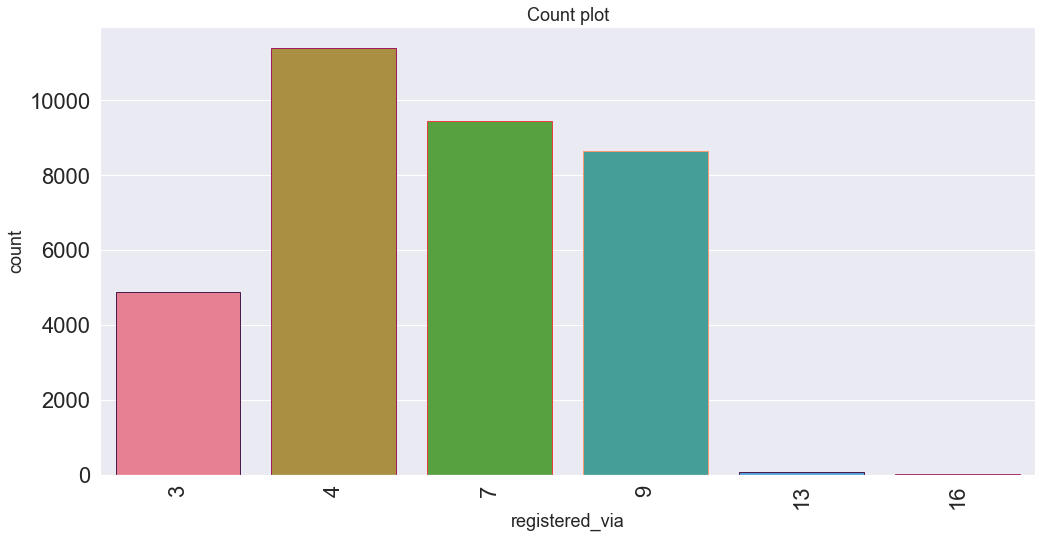

In [82]:
count_plot_function(members,'registered_via')

1] Most of the registrations happened via method '4', '7' and '9'. <br>
2] Few uses have registered theirselves via '13' and '16' methods.

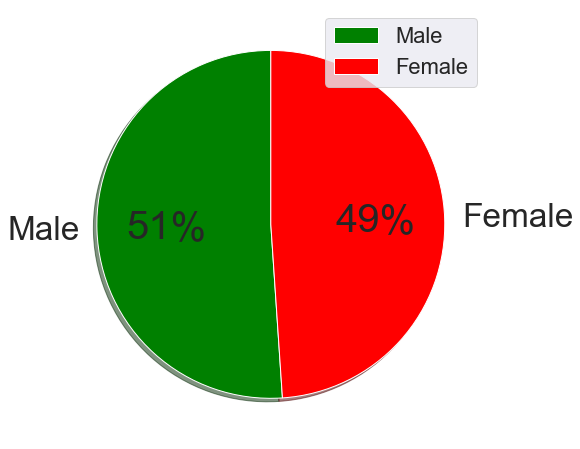

In [87]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 40.0
labels = ['Male','Female']
colors = ['green','red']
plt.figure(figsize = (8, 8))
sizes = pd.value_counts(members.gender)
patches, texts, autotexts = plt.pie(sizes, 
                                    labels=labels,colors=colors, autopct='%.0f%%',
                                    shadow=True, radius=1,startangle=90)
for t in texts:
    t.set_size('smaller')
plt.legend()
plt.show()

In [88]:
print('Data for label 1 : {:.4f}%'.format(train['target'].value_counts()[0]/train.shape[0] * 100))

print('Data for label 0 : {:.4f}%'.format(train['target'].value_counts()[1]/train.shape[0] * 100))

Data for label 1 : 49.6483%
Data for label 0 : 50.3517%


Clearly, the data is well balanced. Label-1 is 49.6% and Label-0 is 50.4%

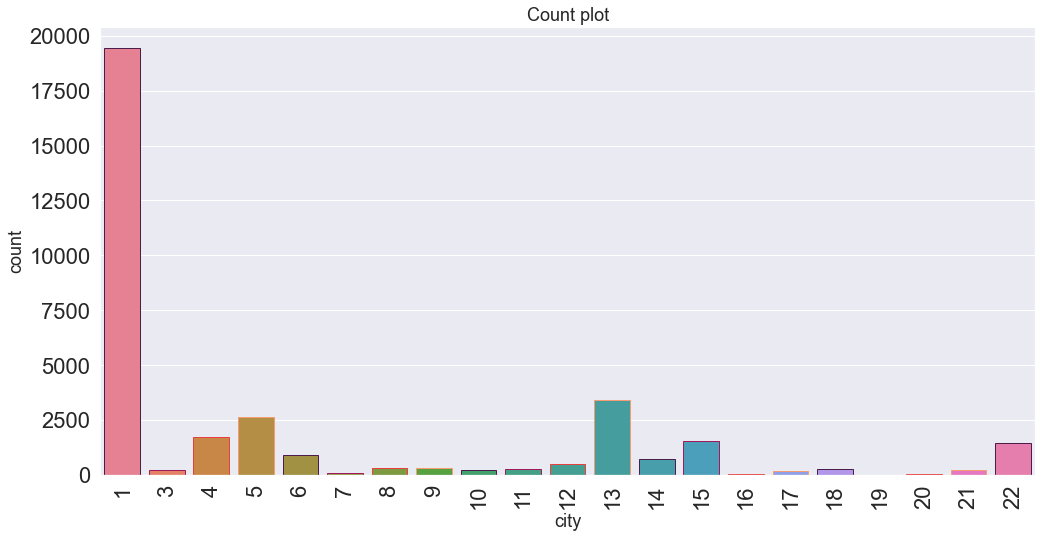

In [93]:
count_plot_function(members, 'city')

1] Most of the people who used to listen songs are from '1'- labelled city. <br>
2] Some cities have very few people who prefer listening music via this music app.

### Doing stats test on members.csv

Text(0.5, 1.0, 'PDF for Registration')

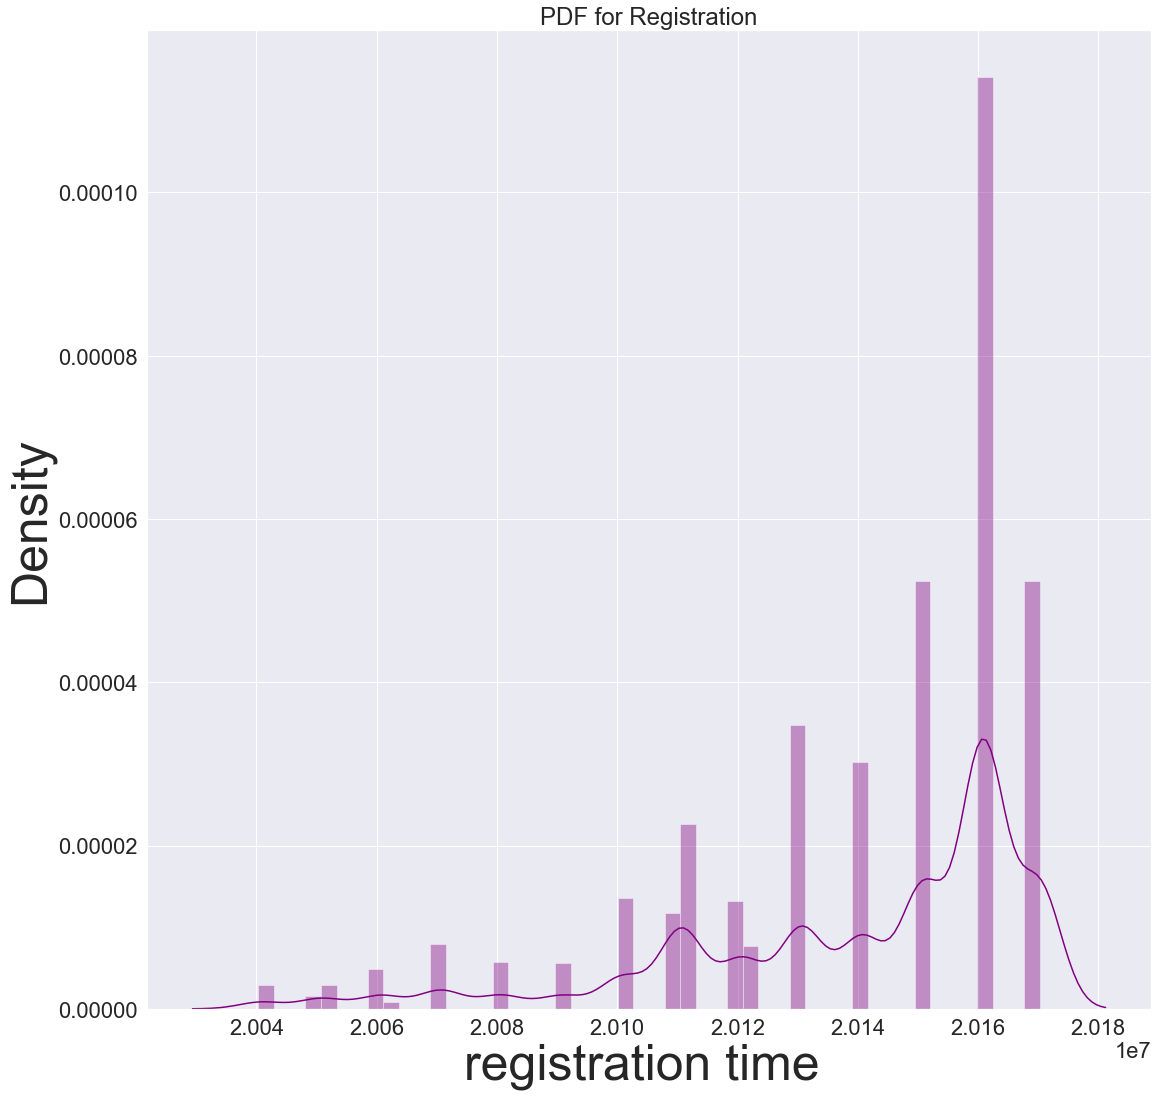

In [115]:
plt.figure(figsize = (18, 18)) 
sns.distplot(members.registration_init_time,color='purple')
sns.set(font_scale=2)
plt.ylabel('Density',fontsize=50)
plt.xlabel('registration time ' ,fontsize=50)
plt.title('PDF for Registration')

We can see that initially people were not fond of listening music but after certain amount time people started to listen music and registered themselves to this music app

#### Function to plot PDF and CDf.

In [113]:
def plot_pdf_cdf(x, flag):
  plt.figure(figsize = (10, 6)) 
  kwargs = {'cumulative': True}
  if flag:
    sns.distplot(x, hist_kws = kwargs, kde_kws = kwargs,color='red')
    plt.title('CDF for age')
  else:
    sns.distplot(x,color='red')
    plt.title('PDF for age')
  sns.set(font_scale=2)

<Figure size 1008x576 with 0 Axes>

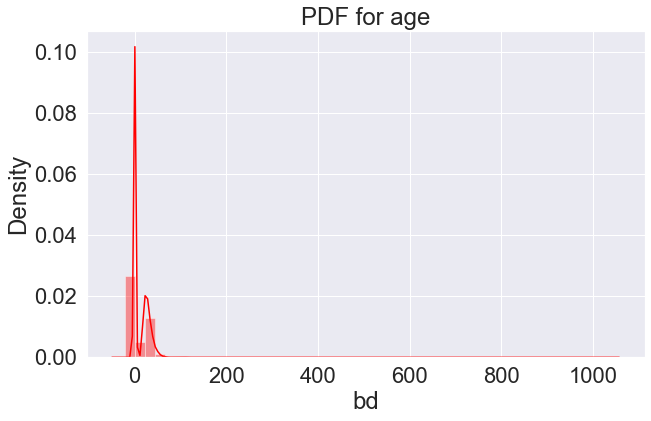

In [114]:
plt.figure(figsize = (14,8)) 
plot_pdf_cdf(members['bd'], False)

<Figure size 1008x576 with 0 Axes>

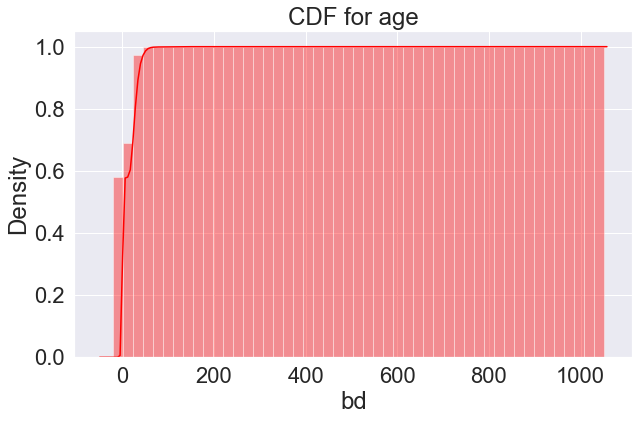

In [116]:
plt.figure(figsize = (14,8)) 
plot_pdf_cdf(members['bd'], True)
plt.show()

In [118]:
np.percentile(members['bd'].values, 98)

47.0

1. 98th percentile user is of 47 age.
2. Means most of the user are below 50.
3. We can also observe via above CDF that almost 99% values are below 50.
4. There are also some outliers like 1030, -38, -43, 1051, etc. As age cannot be negative value or more than 1000 for humans.

In [119]:
songs_all_info = songs.merge(song_extra_info, on='song_id')

In [120]:
def isrc_to_year(isrc):
  if type(isrc) == str:
    if int(isrc[5:7]) > 17:
      return 1900 + int(isrc[5:7])
    else:
      return 2000 + int(isrc[5:7])
  else:
    return np.nan

songs_all_info['song_year'] = songs_all_info['isrc'].apply(isrc_to_year)

In [121]:
songs_all_info['language'].unique()

array([ 3., 31., 52., 17., 10., -1., 24., 59., 45., 38., nan])

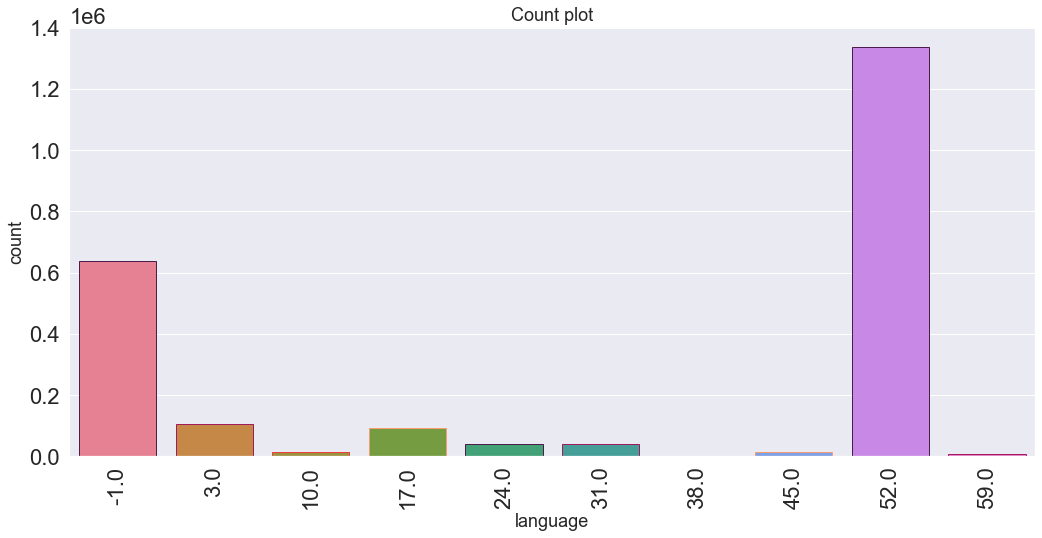

In [122]:
count_plot_function(songs_all_info, 'language')

Users prefer to listen songs from '52' and '-1' language.

## DATA PREPROCESSING AND CLEANING - Feature Engineering

In [69]:
song_cols = ['song_id', 'artist_name', 'genre_ids', 'song_length', 'language']
train = train.merge(songs[song_cols], on='song_id', how='left')
test = test.merge(songs[song_cols], on='song_id', how='left')

In [70]:
members['registration_year'] = members['registration_init_time'].apply(lambda x: int(str(x)[0:4]))
members['registration_month'] = members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members['registration_date'] = members['registration_init_time'].apply(lambda x: int(str(x)[6:8]))

In [71]:
members['expiration_year'] = members['expiration_date'].apply(lambda x: int(str(x)[0:4]))
members['expiration_month'] = members['expiration_date'].apply(lambda x: int(str(x)[4:6]))
members['expiration_date'] = members['expiration_date'].apply(lambda x: int(str(x)[6:8]))
members = members.drop(['registration_init_time'], axis=1)

In [72]:
members_cols = members.columns
train = train.merge(members[members_cols], on='msno', how='left')
test = test.merge(members[members_cols], on='msno', how='left')

In [73]:
train = train.fillna(-1)
test = test.fillna(-1)

In [74]:
import gc
del members, songs; gc.collect();

In [75]:
colm = list(train.columns)
colm.remove('target')

In [76]:
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
for col in tqdm(colm):
    if train[col].dtype == 'object':
        train[col] = train[col].apply(str)
        test[col] = test[col].apply(str)

        le = LabelEncoder()
        train_vals = list(train[col].unique())
        test_vals = list(test[col].unique())
        le.fit(train_vals + test_vals)
        train[col] = le.transform(train[col])
        test[col] = le.transform(test[col])

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [01:05<00:00,  3.46s/it]


In [77]:
unique_songs = range(max(train['song_id'].max(), test['song_id'].max()))
song_popularity = pd.DataFrame({'song_id': unique_songs, 'popularity':0})

train_sorted = train.sort_values('song_id')
train_sorted.reset_index(drop=True, inplace=True)
test_sorted = test.sort_values('song_id')
test_sorted.reset_index(drop=True, inplace=True)

# Model Building

In [78]:
#MODEL BUILDING
from sklearn.model_selection import train_test_split
import lightgbm as lgb
X = np.array(train.drop(['target'], axis=1))
y = train['target'].values

X_test = np.array(test.drop(['id'], axis=1))
ids = test['id'].values

del train, test; gc.collect();

X_train, X_valid, y_train, y_valid = train_test_split(X, y, \
    test_size=0.1, random_state = 12)
    
del X, y; gc.collect();

d_train = lgb.Dataset(X_train, label=y_train)
d_valid = lgb.Dataset(X_valid, label=y_valid) 

watchlist = [d_train, d_valid]

# Trying out basic classification models

### Predicting training score & accuracy on test data using 

### LogisticRegression & XGBoost 

In [40]:
import sklearn.linear_model as lm
logreg = lm.LogisticRegression()
logreg.fit(X_train, y_train)
pred=logreg.predict(X_valid)

#Checking the accuracy of the model
score=accuracy_score(y_valid,pred)
print("Accuracy of Model:",score)

Accuracy of Model: 0.5057811538451111


In [79]:
import xgboost as xgb
XGB = xgb.XGBClassifier()
XGB.fit(X_train, y_train)
pred=XGB.predict(X_valid)

#Checking the accuracy of the model
score=accuracy_score(y_valid,pred)
print("Accuracy of Model:",score)

[16:29:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of Model: 0.6560626885821873


# Prediction using lightgbm

In [51]:
#PREDICTION USING LIGHTGBM
params = {}
params['learning_rate'] = 0.4
params['application'] = 'binary'
params['max_depth'] = 15
params['num_leaves'] = 2**8
params['verbosity'] = 0
params['metric'] = 'auc'

model1 = lgb.train(params, train_set=d_train, num_boost_round=200, valid_sets=watchlist, \
early_stopping_rounds=10, verbose_eval=10)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.119538 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
Training until validation scores don't improve for 10 rounds
[10]	training's auc: 0.711178	valid_1's auc: 0.710232
[20]	training's auc: 0.730905	valid_1's auc: 0.728782
[30]	training's auc: 0.740759	valid_1's auc: 0.73773
[40]	training's auc: 0.750082	valid_1's auc: 0.746363
[50]	training's auc: 0.75821	valid_1's auc: 0.754005
[60]	training's auc: 0.763433	valid_1's auc: 0.758674
[70]	training's auc: 0.767314	valid_1's auc: 0.761831
[80]	training's auc: 0.772381	valid_1's auc: 0.766405
[90]	training's auc: 0.777054	valid_1's auc: 0.770461
[100]	training's auc: 0.780631	valid_1's auc: 0.773498
[110]	training's auc: 0.782625	valid_1's auc: 0.774633
[120]	training's auc: 0.785427	valid_1's auc: 0.776733
[130]	training's auc: 0.788216	valid_1's auc: 0.778833
[140]	

In [52]:
p_test = model1.predict(X_test)

In [86]:
p_test

array([0.42332691, 0.48933314, 0.1542318 , ..., 0.44558114, 0.32860163,
       0.37373251])